<a href="https://colab.research.google.com/github/Yassaadi/energy_ghg_prediction/blob/main/P4_EnergyUse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YASSINE ASSAADI, DS-P4

Mounted at /content/drive


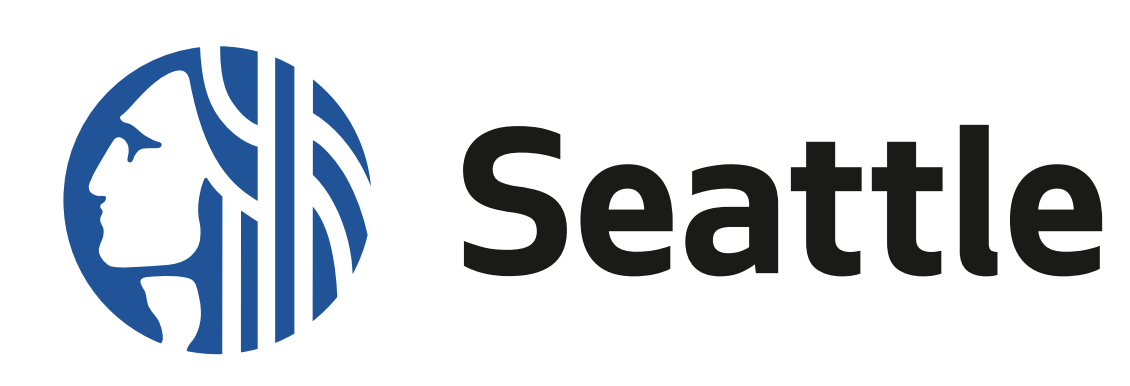

In [ ]:
#GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/P4-Energy&GHG/Seattle.png',width=250, height=100, )

# Project descritption

This project is dedicated to estimate Seattle city buildings annual GHG emission and total energy consumption. In particular, non residential buildings based on 2016 collected data.
This project contains three notebooks as follows:

1.   Assaadi_Yassine_1_notebook_exploratoire_102022: data cleaning, features distribution and transformation, outliers elimination and model subspaces creation.

2.   Assaadi_Yassine_2_notebook_prediction_102022: Concerns GHG emission, it contains models testing, best estimator choice and features effect on the model analysis. 

3.   Assaadi_Yassine_3_notebook_prediction_102022: Concerns total energy consumption,it contains as well models testing, best estimator choice and features effect on the model analysis.

Link to data source:
https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy 

Here is a flow chart of all data evolution, from basic cleaning until pre-modeling phase.



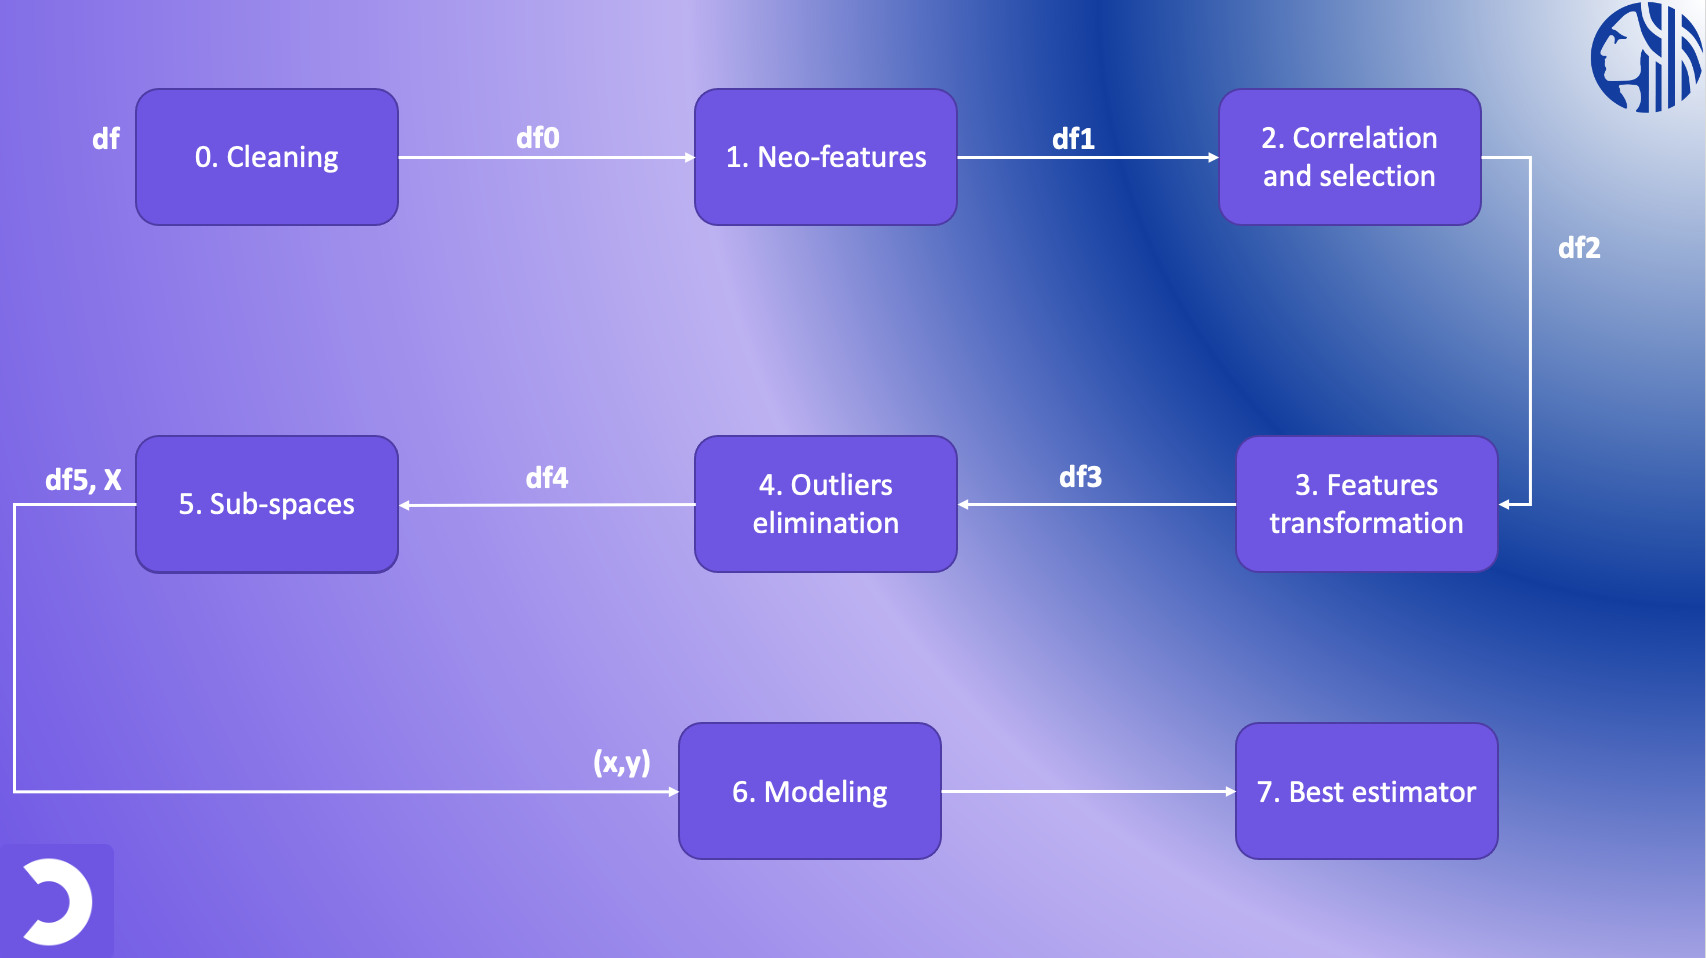

In [ ]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/P4-Energy&GHG/FlowChart.png',width=800, height=400 )

In [ ]:
#BASIC LIBs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#STAT TOOLS
from math import sqrt
from scipy import stats #BoxCox
import random
from numpy.lib.function_base import percentile
from pandas.core.algorithms import quantile

#GRAPHS
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

#TRANSFORMATION
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA

#METRICS
from sklearn.metrics import mean_squared_error, r2_score

#DATA SPLITING 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

#IMPUTERS
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#REGRESSION MODELS
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.dummy import DummyRegressor

#GRID SEARCH
from sklearn.model_selection import GridSearchCV

#PIPELINES
from sklearn.pipeline import make_pipeline 
from sklearn.pipeline import Pipeline

#Columns & rows size
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 


#graphs default configuration
plt.rcParams['figure.figsize']=(10,6)
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_formats = ['svg']

In [ ]:
Path= "/content/drive/MyDrive/Colab Notebooks/P4-Energy&GHG/P4-Prepared_Data.csv"

df5 = pd.read_csv(Path,encoding="utf-8")

df5= df5.drop('TotalGHGEmissions', axis=1)

df5= df5.set_index('index', drop=True)

In [ ]:
df5.head(2)

BuildingType  Latitude  Longitude  YearBuilt  NumberofFloors  \
index                                                                   
0      NonResidential -0.246856  -0.118337  -1.254151        1.661620   
1      NonResidential -0.226501   0.031301   0.829597        1.557797   

       PropertyGFATotal  ENERGYSTARScore_Median  SiteEnergyUse(kBtu)  Steam  \
index                                                                         
0              0.783524               -0.602462             1.021039      1   
1              0.935720               -0.557336             1.138037      0   

       Gas  BuildingUse  Sensitivity  UseType_Multifamily Housing  \
index                                                               
0        1    -0.150359         -1.0                          0.0   
1        1    -0.150359         -1.0                          0.0   

       UseType_Office  UseType_Non-Refrigerated Warehouse  \
index                                                       
0                 0.0                                 0.0   
1                 0.0                                 0.0   

       UseType_K-12 School  UseType_Retail Store  UseType_Hotel  \
index                                                             
0                      0.0                   0.0       1.000000   
1                      0.0                   0.0       0.809918   

       UseType_Worship Facility  UseType_Distribution Center  \
index                                                          
0                           0.0                          0.0   
1                           0.0                          0.0   

       UseType_Senior Care Community  UseType_Supermarket/Grocery Store  \
index                                                                     
0                                0.0                                0.0   
1                                0.0                                0.0   

       UseType_Medical Office  UseType_Parking  UseType_Self-Storage Facility  \
index                                                                           
0                         0.0         0.000000                            0.0   
1                         0.0         0.145453                            0.0   

       UseType_College/University  UseType_Residence Hall/Dormitory  \
index                                                                 
0                             0.0                               0.0   
1                             0.0                               0.0   

       UseType_Other - Recreation  \
index                               
0                             0.0   
1                             0.0   

       UseType_Other - Entertainment/Public Assembly  UseType_Laboratory  \
index                                                                      
0                                                0.0                 0.0   
1                                                0.0                 0.0   

       UseType_Refrigerated Warehouse  UseType_Restaurant  \
index                                                       
0                                 0.0                 0.0   
1                                 0.0                 0.0   

       UseType_Social/Meeting Hall  \
index                                
0                              0.0   
1                              0.0   

       UseType_Hospital (General Medical & Surgical)  \
index                                                  
0                                                0.0   
1                                                0.0   

       UseType_Manufacturing/Industrial Plant  \
index                                           
0                                         0.0   
1                                         0.0   

       UseType_Repair Services (Vehicle, Shoe, Locksmith, etc)  \
index                                                            
0                                 

# 6. Subspaces 



## 6.1. KNN Imputer for ENERGYSTARScore

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

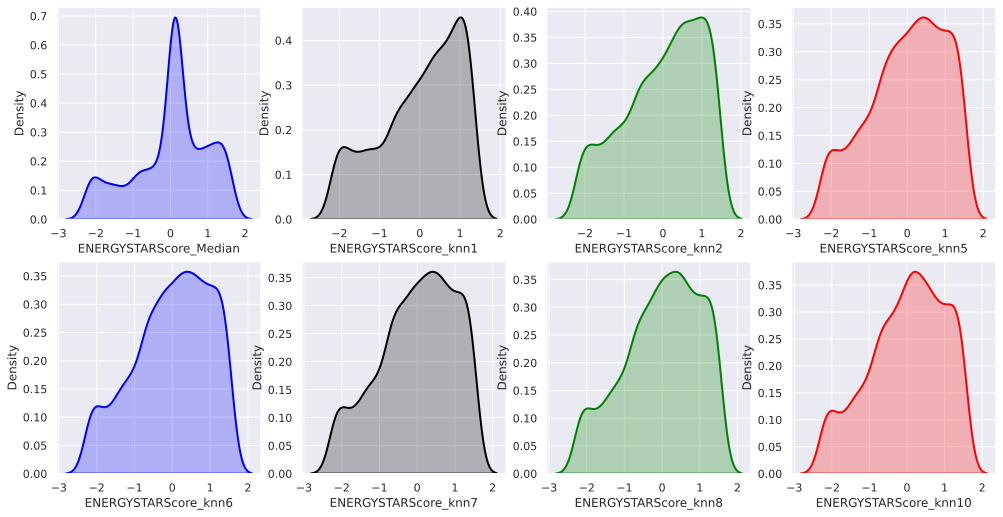

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 4, figsize=(15,8))

#ENERGYSTARScore with simple imputer = median
sns.distplot(df5['ENERGYSTARScore_Median'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='blue', ax=axs[0,0])
#ENERGYSTARScore with knn=1
sns.distplot(df5['ENERGYSTARScore_knn1'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='black', ax=axs[0,1])
#ENERGYSTARScore with knn=2
sns.distplot(df5['ENERGYSTARScore_knn2'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='green', ax=axs[0,2])
#ENERGYSTARScore with knn=5
sns.distplot(df5['ENERGYSTARScore_knn5'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='red', ax=axs[0,3])
#ENERGYSTARScore with knn=6
sns.distplot(df5['ENERGYSTARScore_knn6'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='blue', ax=axs[1,0])
#ENERGYSTARScore with knn=7
sns.distplot(df5['ENERGYSTARScore_knn7'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='black', ax=axs[1,1])
#ENERGYSTARScore with knn=8
sns.distplot(df5['ENERGYSTARScore_knn8'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='green', ax=axs[1,2])
#ENERGYSTARScore with knn=10
sns.distplot(df5['ENERGYSTARScore_knn10'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='red', ax=axs[1,3])

## 6.2. Building Types effect on the model

In [ ]:
data_resid = df5.copy()
data_Nresid = df5.copy()
Residences = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']

data_resid = data_resid[data_resid['BuildingType'].isin(Residences)] 
data_Nresid = data_Nresid[~data_Nresid['BuildingType'].isin(Residences)] 
data_resid.shape

(1603, 78)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

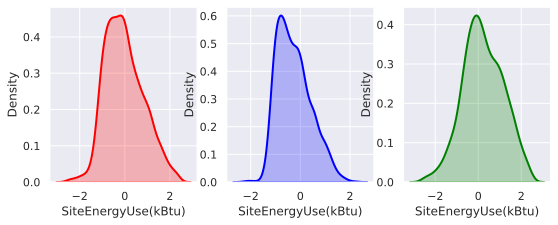

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(8,3))

sns.distplot(df5['SiteEnergyUse(kBtu)'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='red', ax=axs[0])

sns.distplot(data_resid['SiteEnergyUse(kBtu)'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='blue', ax=axs[1])

sns.distplot(data_Nresid['SiteEnergyUse(kBtu)'], hist = False, kde=True, kde_kws = {'shade': True, 'linewidth': 2}, color='green', ax=axs[2])

plt.show() 


In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(
        y=df5['SiteEnergyUse(kBtu)'],
        name= 'SiteEnergyUse(kBtu)',
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        ))
fig.add_trace(go.Box(
        y=data_resid['SiteEnergyUse(kBtu)'],
        name= 'Residential SiteEnergyUse(kBtu)',
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
        ))
fig.add_trace(go.Box(
        y=data_Nresid['SiteEnergyUse(kBtu)'],
        name= 'Non residential SiteEnergyUse(kBtu)',
        jitter=0.3,
        pointpos=-1.8,
        boxpoints='all',
         ))
                    
fig.update_layout(title= "Distribution of Energy for Residential/Non Residential")
fig.show()

## 6.3. Model features selection

In [ ]:
#Out of bag features 
OOBF = ['ENERGYSTARScore_Median',#0,  Estimated ENERGYSTARScore with simple MEDIAN imputation
        'ENERGYSTARScore_knn1',  #1,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 1
        'ENERGYSTARScore_knn2',  #2,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 2
        'ENERGYSTARScore_knn5',  #3,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 5
        'ENERGYSTARScore_knn6',  #4,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 6 
        'ENERGYSTARScore_knn7',  #5,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 7
        'ENERGYSTARScore_knn8',  #6,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 8
        'ENERGYSTARScore_knn10',  #7,  Estimated ENERGYSTARScore with KNNimputer, n_neighbors = 10
        'BuildingType'           #8
        ]

#Features to exclude
F = OOBF.copy()
F.remove('ENERGYSTARScore_knn8')
X = df5.drop(F ,  axis=1)
X.head(1)

Latitude  Longitude  YearBuilt  NumberofFloors  PropertyGFATotal  \
index                                                                     
0     -0.246856  -0.118337  -1.254151         1.66162          0.783524   

       SiteEnergyUse(kBtu)  Steam  Gas  BuildingUse  Sensitivity  \
index                                                              
0                 1.021039      1    1    -0.150359         -1.0   

       UseType_Multifamily Housing  UseType_Office  \
index                                                
0                              0.0             0.0   

       UseType_Non-Refrigerated Warehouse  UseType_K-12 School  \
index                                                            
0                                     0.0                  0.0   

       UseType_Retail Store  UseType_Hotel  UseType_Worship Facility  \
index                                                                  
0                       0.0            1.0                       0.0   

       UseType_Distribution Center  UseType_Senior Care Community  \
index                                                               
0                              0.0                            0.0   

       UseType_Supermarket/Grocery Store  UseType_Medical Office  \
index                                                              
0                                    0.0                     0.0   

       UseType_Parking  UseType_Self-Storage Facility  \
index                                                   
0                  0.0                            0.0   

       UseType_College/University  UseType_Residence Hall/Dormitory  \
index                                                                 
0                             0.0                               0.0   

       UseType_Other - Recreation  \
index                               
0                             0.0   

       UseType_Other - Entertainment/Public Assembly  UseType_Laboratory  \
index                                                                      
0                                                0.0                 0.0   

       UseType_Refrigerated Warehouse  UseType_Restaurant  \
index                                                       
0                                 0.0                 0.0   

       UseType_Social/Meeting Hall  \
index                                
0                              0.0   

       UseType_Hospital (General Medical & Surgical)  \
index                                                  
0                                                0.0   

       UseType_Manufacturing/Industrial Plant  \
index                                           
0                                         0.0   

       UseType_Repair Services (Vehicle, Shoe, Locksmith, etc)  \
index                                                            
0                                                          0.0   

       UseType_Other - Lodging/Residential  UseType_Strip Mall  \
index                                                            
0                                      0.0                 0.0   

       UseType_Fitness Center/Health Club/Gym  UseType_Other - Services  \
index                                                                     
0                                         0.0                       0.0   

       UseType_Museum  UseType_Automobile Dealership  UseType_Bank Branch  \
index                                                                       
0                 0.0                            0.0                  0.0   

       UseType_Urgent Care/Clinic/Other Outpatient  \
index                                                
0                                              0.0   

       UseType_Other/Specialty Hospital  UseType_Other - Mall  \
index                                                           
0                                   0.0                   0.0   

       UseType_Library  Us

In [ ]:
y = X['SiteEnergyUse(kBtu)'] 
x= pd.get_dummies(X, drop_first=True).drop(['SiteEnergyUse(kBtu)'],axis=1)  

## 6.4. Correlation check

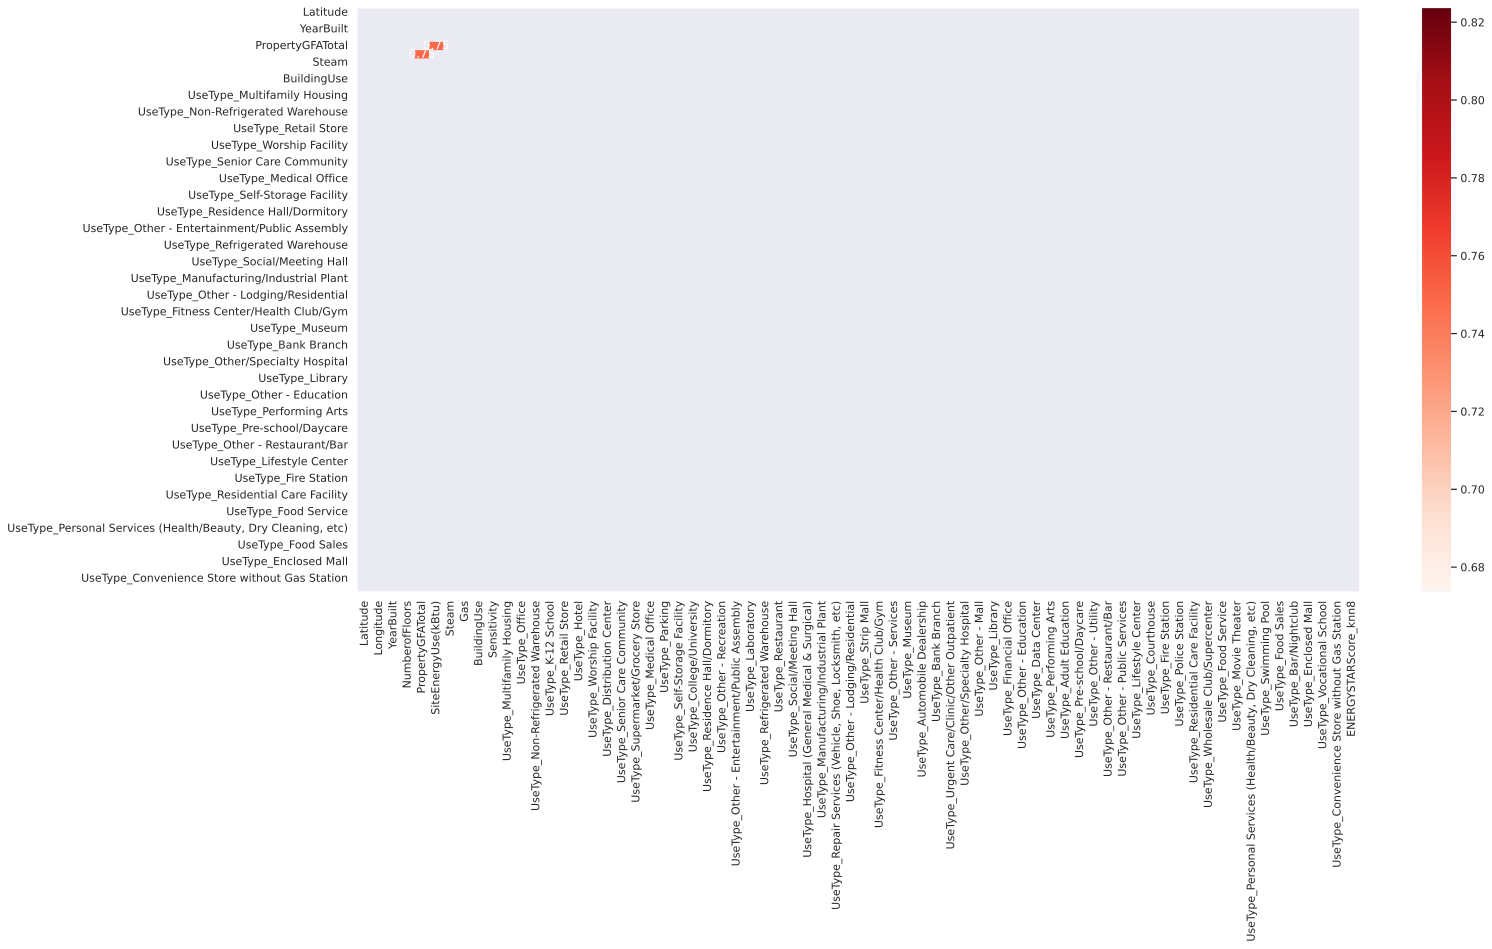

In [ ]:
corr = X.corr()
HighCorr = corr[((corr >= .7) | (corr <= -.7)) & (corr !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(HighCorr, annot=True, cmap="Reds")
plt.show()

In [ ]:
HCVariable = HighCorr.unstack().sort_values().drop_duplicates()
HCVariable

PropertyGFATotal  SiteEnergyUse(kBtu)    0.748647
Latitude          Latitude                    NaN
dtype: float64

# 7. Pre-modeling: Metrics and functions 

### 7.1. Models comparator

In [ ]:
Metrics = np.array(['R2', 'RMSE', 'GridS-R2', 'GridS-RMSE'])

In [ ]:
ModelCompare = pd.DataFrame({'Metrics' : Metrics})
ModelCompare

Metrics
0          R2
1        RMSE
2    GridS-R2
3  GridS-RMSE

### 7.2. Model evaluator

In [ ]:
def AlgEval(y_eval, y_pred):
  RMSE = round(sqrt(mean_squared_error(y_eval, y_pred )),2)
  R2 = round(r2_score(y_eval, y_pred ),2)
  return(RMSE,R2)

def EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train):
  print("Model metrics")
  print(f"train RMSE= {RMSE_train} - train R2= {R2_train} ")
  print(f"test RMSE= {RMSE_test} - test R2= {R2_test} ")

### 7.3. Cross validation 

#### 7.3.1. Algorithm

In [ ]:
def ModelEval(Algorithm, x_train, y_train, x_test, y_test):
  
  Algorithm.fit(x_train, y_train)
  test_pred = Algorithm.predict(x_test)
  train_pred = Algorithm.predict(x_train)  

  RMSE_train, R2_train = AlgEval(y_train, train_pred)
  RMSE_test, R2_test = AlgEval(y_test, test_pred) 
 
  return (RMSE_test, R2_test, RMSE_train, R2_train)

#### 7.3.2. Scorers

In [ ]:
def R2(Algorithm, x, y):
  x_pred = Algorithm.predict(x)  
  RMSE= round(sqrt(mean_squared_error(y, x_pred)),2)
  R2= round(r2_score(y, x_pred),2)
  print(f"RMSE= {RMSE} - R2= {R2} ")
  return R2

In [ ]:
def RMSE(Algorithm, x, y):
  x_pred = Algorithm.predict(x)  
  RMSE= round(sqrt(mean_squared_error(y, x_pred)),2)
  R2= round(r2_score(y, x_pred),2)
  return RMSE

### 7.4. Iterations with simple split (Dichotomous)

In [ ]:
def Dichotomous_split(Algorithm, x,y,iteration):

  Atest_RMSE, Atest_R2 = 0.0, 0.0
  Atrain_RMSE, Atrain_R2 = 0.0, 0.0

  for i in range(iteration):
    
    x_train, x_test,  y_train, y_test = train_test_split(x,y,test_size = 0.2) #Data simple split

    
    RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test) 

    Atest_RMSE = Atest_RMSE + RMSE_test
    Atest_R2 = Atest_R2 + R2_test
    Atrain_RMSE = Atrain_RMSE + RMSE_train
    Atrain_R2 = Atrain_R2 + R2_train    

 
  return(round(Atest_RMSE/iteration,2), round(Atest_R2/iteration,2))

### 7.5.  Plot function

In [ ]:
def ModelPlot(Algorithm ,x_train, y_train, x_test, y_test):
 
  Algorithm.fit(x_train, y_train)
  test_pred = Algorithm.predict(x_test)
  train_pred = Algorithm.predict(x_train)

  RMSE_train, R2_train = AlgEval(y_train, train_pred)
  RMSE_test, R2_test = AlgEval(y_test, test_pred) 

  fig = plt.figure(figsize= (7,4))
  plt.scatter(y_test, test_pred, color='blue')
  plt.title('Prediction of the model', size= 13)
  plt.xlabel("Observations", size= 12)
  plt.ylabel("Predictions", size= 12)
  plt.plot(y_test, y_test,'red', lw=1)
  plt.show()

# 8. Modeling 

## Dummy regressor

In [ ]:
Algorithm = DummyRegressor(strategy = 'median')

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)
RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)
EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.85 - train R2= -0.01 
test RMSE= 0.88 - test R2= -0.03 


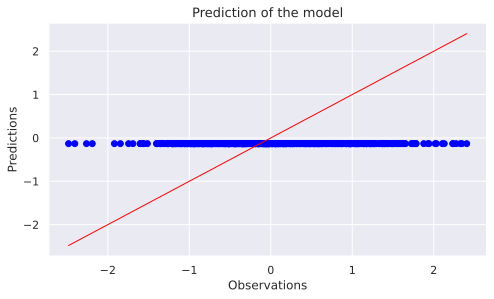

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
DummyReg = []
DummyReg_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
DummyReg_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2) 
DummyReg = [np.mean(DummyReg_R2), np.mean(DummyReg_RMSE)]
DummyReg = np.pad(DummyReg,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Dummy regressor'] = DummyReg
ModelCompare

RMSE= 1.32 - R2= -1.58 
RMSE= 0.71 - R2= -0.0 
RMSE= 0.77 - R2= -0.19 
RMSE= 0.76 - R2= -0.17 
RMSE= 0.8 - R2= -0.01 


Metrics  Dummy regressor
0          R2           -0.390
1        RMSE            0.872
2    GridS-R2              NaN
3  GridS-RMSE              NaN

## A. Linear Regression

### A1. Default parameters

In [ ]:
Algorithm = LinearRegression ()

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)
RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)
EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.36 - train R2= 0.82 
test RMSE= 0.43 - test R2= 0.74 


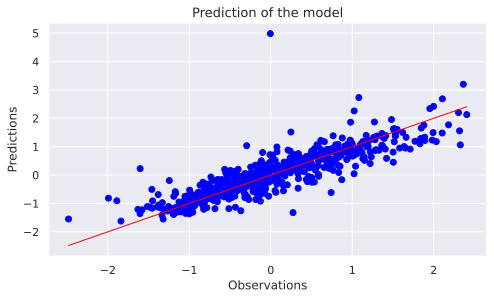

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

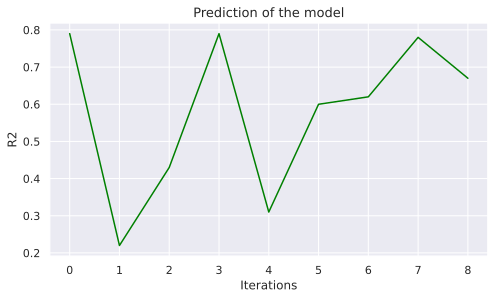

In [ ]:
max_iteration = 10
rmse = []
r2 = []

for iteration in range(1, max_iteration):
    
    RMSE_, R2_ = Dichotomous_split(Algorithm, x, y, iteration)
    r2.append(R2_)
    rmse.append(RMSE_)
        
fig = plt.figure(figsize= (7,4))
plt.plot(range(iteration), r2, color='green', lw=1.5)
plt.title('Prediction of the model', size= 13)
plt.xlabel("Iterations", size= 12)
plt.ylabel("R2", size= 12)
plt.show()

In [ ]:
LinearReg = []
LinReg_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
LinReg_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2) 
LinearReg = [np.mean(LinReg_R2), np.mean(LinReg_RMSE)]
LinearReg = np.pad(LinearReg,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Linear Regression'] = LinearReg
ModelCompare

RMSE= 0.49 - R2= 0.64 
RMSE= 0.39 - R2= 0.69 
RMSE= 0.35 - R2= 0.75 
RMSE= 1.03 - R2= -1.16 
RMSE= 0.33 - R2= 0.83 


Metrics  Dummy regressor  Linear Regression
0          R2           -0.390              0.350
1        RMSE            0.872              0.518
2    GridS-R2              NaN                NaN
3  GridS-RMSE              NaN                NaN

### A3. Linear regression: Parameters tuning 

In [ ]:
PolyRegAlg = Pipeline([('Polynomial features',PolynomialFeatures()),
                      ('linear regression', LinearRegression())])
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [ ]:
PolyRegAlg = Pipeline([('Polynomial features',PolynomialFeatures()),
                      ('linear regression', LinearRegression())])

param_grid = {'Polynomial features__degree': [1, 2, 3]}

Poly_GSCV = GridSearchCV(PolyRegAlg, param_grid, cv=5)

Poly_GSCV.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Polynomial features',
                                        PolynomialFeatures()),
                                       ('linear regression',
                                        LinearRegression())]),
             param_grid={'Polynomial features__degree': [1, 2, 3]})

In [ ]:
print(Poly_GSCV.best_params_)
print(f'Best score: {Poly_GSCV.best_score_}')

{'Polynomial features__degree': 1}
Best score: 0.34889328993820456


In [ ]:
LinReg_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
LinReg_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2) 
LinearReg = [np.mean(LinReg_R2), np.mean(LinReg_RMSE)]
LinearReg = np.pad(LinearReg,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Linear Regression'] = LinearReg
ModelCompare

RMSE= 0.49 - R2= 0.64 
RMSE= 0.39 - R2= 0.69 
RMSE= 0.35 - R2= 0.75 
RMSE= 1.03 - R2= -1.16 
RMSE= 0.33 - R2= 0.83 


Metrics  Dummy regressor  Linear Regression
0          R2           -0.390              0.350
1        RMSE            0.872              0.518
2    GridS-R2              NaN                NaN
3  GridS-RMSE              NaN                NaN

## B. Regularization

### B1. Ridge regularisation

In [ ]:
Algorithm= Ridge(alpha=1) #degree =2

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.37 - train R2= 0.82 
test RMSE= 0.36 - test R2= 0.81 


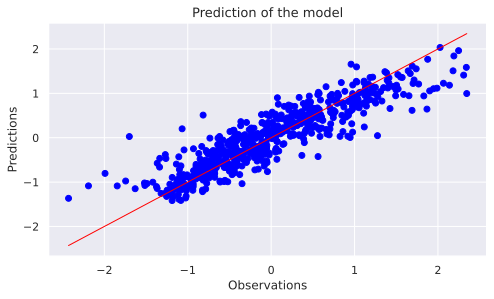

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
LinRidge=[]
LinRidge_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
LinRidge_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
LinRidge = [np.mean(LinRidge_R2), np.mean(LinRidge_RMSE)]
LinRidge = np.pad(LinRidge ,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Ridge Regularization'] = LinRidge
ModelCompare

RMSE= 0.48 - R2= 0.66 
RMSE= 0.39 - R2= 0.7 
RMSE= 0.35 - R2= 0.75 
RMSE= 0.38 - R2= 0.7 
RMSE= 0.34 - R2= 0.82 


Metrics  Dummy regressor  Linear Regression  Ridge Regularization
0          R2           -0.390              0.350                 0.726
1        RMSE            0.872              0.518                 0.388
2    GridS-R2              NaN                NaN                   NaN
3  GridS-RMSE              NaN                NaN                   NaN

### B2. Elastic net regularisation

In [ ]:
Algorithm= linear_model.ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)


Model metrics
train RMSE= 0.49 - train R2= 0.67 
test RMSE= 0.47 - test R2= 0.68 


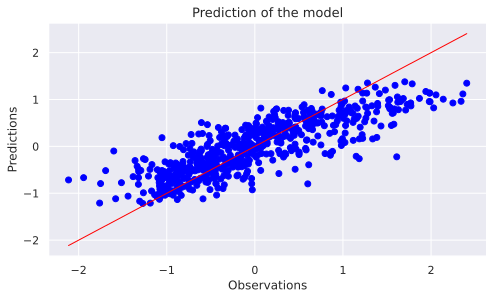

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
ElasticNet = []
ElasticNet_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
ElasticNet_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
ElasticNet = [np.mean(ElasticNet_R2), np.mean(ElasticNet_RMSE)]
ElasticNet = np.pad(ElasticNet,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['ElasticNet regularization'] = ElasticNet
ModelCompare

RMSE= 0.7 - R2= 0.27 
RMSE= 0.46 - R2= 0.58 
RMSE= 0.46 - R2= 0.58 
RMSE= 0.46 - R2= 0.57 
RMSE= 0.44 - R2= 0.69 


Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                   NaN   
3  GridS-RMSE              NaN                NaN                   NaN   

   ElasticNet regularization  
0                      0.538  
1                      0.504  
2                        NaN  
3                        NaN

### B3. Regularization: Parameters tuning 

In [ ]:
ElasticNet_params = {
    "alpha" : [0.0001, 0.001, 0.1],
    "l1_ratio": [0, 0.2, 0.5, 0.8, 1]
    }
    
ElasticNetAlg = linear_model.ElasticNet()

ElasticNet_GSCV = GridSearchCV(ElasticNetAlg, ElasticNet_params , cv=5)

ElasticNet_GSCV.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e+02, tolerance: 1.357e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.601e+02, tolerance: 1.913e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/p

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.1],
                         'l1_ratio': [0, 0.2, 0.5, 0.8, 1]})

In [ ]:
ElasticNetAlg.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'l1_ratio', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [ ]:
print(ElasticNet_GSCV.best_params_)
print(f'Best score: {ElasticNet_GSCV.best_score_}')

{'alpha': 0.0001, 'l1_ratio': 0.5}
Best score: 0.7274375540982463


In [ ]:
ElasticNet_GSAlg = linear_model.ElasticNet(alpha=0.001, l1_ratio=0)

In [ ]:
ElasticNet_GS_R2 = cross_val_score(ElasticNet_GSAlg, x, y, cv=5, scoring=R2)
ElasticNet_GS_RMSE = cross_val_score(ElasticNet_GSAlg, x, y, cv=5, scoring=RMSE)

ElasticNet[2] = np.mean(ElasticNet_GS_R2)
ElasticNet[3] = np.mean(ElasticNet_GS_RMSE)
LinRidge[2] = np.mean(ElasticNet_GS_R2)
LinRidge[3] = np.mean(ElasticNet_GS_RMSE)

ModelCompare['ElasticNet regularization'] = ElasticNet
ModelCompare['Ridge Regularization'] = LinRidge
ModelCompare

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+02, tolerance: 1.357e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.48 - R2= 0.66 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.729e+02, tolerance: 1.913e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.39 - R2= 0.7 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.803e+02, tolerance: 1.851e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.35 - R2= 0.75 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.730e+02, tolerance: 1.855e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.38 - R2= 0.7 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.833e+02, tolerance: 1.838e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



RMSE= 0.34 - R2= 0.82 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+02, tolerance: 1.357e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.729e+02, tolerance: 1.913e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/usr/local/lib/p

Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                 0.726   
3  GridS-RMSE              NaN                NaN                 0.388   

   ElasticNet regularization  
0                      0.538  
1                      0.504  
2                      0.726  
3                      0.388

## C. SVM Regression

### C1. SVM Regressor: Linear

In [ ]:
Algorithm = SVR(kernel="linear", C=100, epsilon=0.1)

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.37 - train R2= 0.81 
test RMSE= 0.38 - test R2= 0.81 


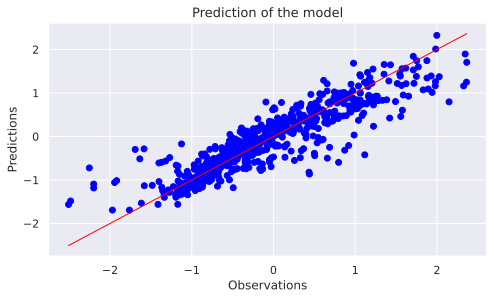

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
SVRLin=[]
SVRLin_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
SVRLin_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
SVRLin = [np.mean(SVRLin_R2), np.mean(SVRLin_RMSE)]
SVRLin = np.pad(SVRLin,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Linear SVM Resgression'] = SVRLin
ModelCompare

RMSE= 0.52 - R2= 0.6 
RMSE= 0.4 - R2= 0.68 
RMSE= 0.35 - R2= 0.75 
RMSE= 0.5 - R2= 0.49 
RMSE= 0.33 - R2= 0.83 


Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                 0.726   
3  GridS-RMSE              NaN                NaN                 0.388   

   ElasticNet regularization  Linear SVM Resgression  
0                      0.538                    0.67  
1                      0.504                    0.42  
2                      0.726                     NaN  
3                      0.388                     NaN

### C2. SVM Regressor = Non linear (Polynomial kernel)

In [ ]:
Algorithm = SVR(kernel="poly", degree=2, C=10, epsilon=0.1)

In [ ]:
RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.32 - train R2= 0.86 
test RMSE= 0.4 - test R2= 0.78 


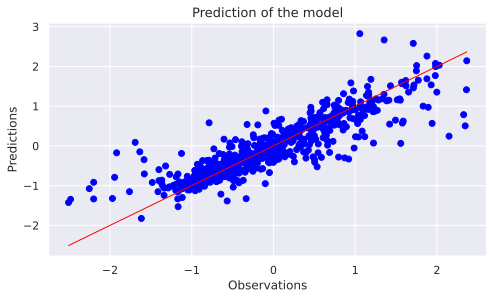

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
SVRPoly=[]
SVRPoly_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)

SVRPoly_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)

SVRPoly = [np.mean(SVRPoly_R2), np.mean(SVRPoly_RMSE)]

SVRPoly = np.pad(SVRPoly,(0,2), mode='constant',constant_values=(np.nan,))

RMSE= 0.54 - R2= 0.57 
RMSE= 0.4 - R2= 0.68 
RMSE= 0.35 - R2= 0.75 
RMSE= 0.42 - R2= 0.64 
RMSE= 0.36 - R2= 0.8 


In [ ]:
ModelCompare['SVM Regression: Polynomial kernel'] = SVRPoly
ModelCompare

Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                 0.726   
3  GridS-RMSE              NaN                NaN                 0.388   

   ElasticNet regularization  Linear SVM Resgression  \
0                      0.538                    0.67   
1                      0.504                    0.42   
2                      0.726                     NaN   
3                      0.388                     NaN   

   SVM Regression: Polynomial kernel  
0                              0.688  
1                              0.414  
2                                NaN  
3                                NaN

### C3. SVM Regressor: Parameters tuning 

In [ ]:
SVRAlg = SVR()

SVR_params = {
   'kernel':['rbf'],
   'gamma':[0.0001, 0.01, 1, 10], 
   'C':[10, 100, 150],
   'epsilon' : [0.1, 1, 1,5] } 


SVR_GSCV = GridSearchCV(SVRAlg , param_grid = SVR_params, cv=5)

SVR_GSCV.fit(x, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [10, 100, 150], 'epsilon': [0.1, 1, 1, 5],
                         'gamma': [0.0001, 0.01, 1, 10], 'kernel': ['rbf']})

In [ ]:
print(SVR_GSCV.best_params_)
print(f'Best score: {SVR_GSCV.best_score_}')

{'C': 10, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.7908073835332432


In [ ]:
SVRGS_Alg = SVR(kernel="rbf", epsilon=0.1,  gamma=0.01, C=10)

In [ ]:
SVRGS_R2 = cross_val_score(SVRGS_Alg, x, y, cv=5, scoring=R2)
SVRGS_RMSE = cross_val_score(SVRGS_Alg, x, y, cv=5, scoring=RMSE)

SVRPoly[2] = np.mean(SVRGS_R2)
SVRPoly[3] = np.mean(SVRGS_RMSE)
SVRLin[2] = np.mean(SVRGS_R2)
SVRLin[3] = np.mean(SVRGS_RMSE)

ModelCompare['SVM Regression: Polynomial kernel'] = SVRPoly
ModelCompare['Linear SVM Resgression'] = SVRLin
ModelCompare

RMSE= 0.39 - R2= 0.77 
RMSE= 0.34 - R2= 0.77 
RMSE= 0.31 - R2= 0.81 
RMSE= 0.35 - R2= 0.76 
RMSE= 0.31 - R2= 0.85 


Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                 0.726   
3  GridS-RMSE              NaN                NaN                 0.388   

   ElasticNet regularization  Linear SVM Resgression  \
0                      0.538                   0.670   
1                      0.504                   0.420   
2                      0.726                   0.792   
3                      0.388                   0.340   

   SVM Regression: Polynomial kernel  
0                              0.688  
1                              0.414  
2                              0.792  
3                              0.340

## D. Ensemble Algorithms

### D1. Random Forest Regression (Bagging)

#### D1.1. Default parameters

In [ ]:
Algorithm = RandomForestRegressor(n_estimators=100, max_leaf_nodes= 16, n_jobs = -1)

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

Model metrics
train RMSE= 0.41 - train R2= 0.77 
test RMSE= 0.46 - test R2= 0.68 


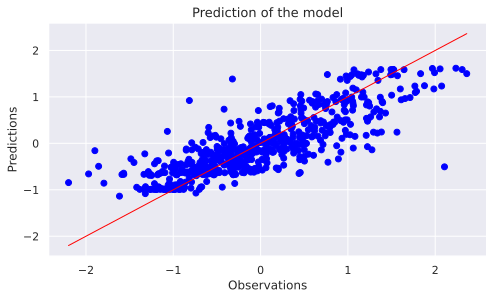

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
RFR=[]
RFR_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
RFR_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
RFR = [np.mean(RFR_R2), np.mean(RFR_RMSE)]
RFR = np.pad(RFR,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Random Forest'] = RFR
ModelCompare

RMSE= 0.59 - R2= 0.49 
RMSE= 0.44 - R2= 0.62 
RMSE= 0.43 - R2= 0.63 
RMSE= 0.44 - R2= 0.62 
RMSE= 0.41 - R2= 0.74 


Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                 0.726   
3  GridS-RMSE              NaN                NaN                 0.388   

   ElasticNet regularization  Linear SVM Resgression  \
0                      0.538                   0.670   
1                      0.504                   0.420   
2                      0.726                   0.792   
3                      0.388                   0.340   

   SVM Regression: Polynomial kernel  Random Forest  
0                              0.688          0.620  
1                              0.414          0.456  
2                              0.792            NaN  
3                              0.340            NaN

#### D1.2. Random Forest - Parameters tuning 

In [ ]:
RFRAlg = RandomForestRegressor()

RFR_params = {
   'max_leaf_nodes': [16, 24, 32 ],
   'max_samples': [0.5, 0.7, 1],
   'bootstrap' : [True, False],  
   'n_estimators': [400, 500, 700]
}

RFR_GSCV = GridSearchCV(RFRAlg, param_grid = RFR_params, cv=5)

RFR_GSCV.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 380, in fit
    "`max_sample` cannot be set if `bootstrap=False`. "
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.


/usr/local/lib/python3.7/dist-packages/sk

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_leaf_nodes': [16, 24, 32],
                         'max_samples': [0.5, 0.7, 1],
                         'n_estimators': [400, 500, 700]})

In [ ]:
print(RFR_GSCV.best_params_)
print(f'Best score: {RFR_GSCV.best_score_}')

{'bootstrap': True, 'max_leaf_nodes': 32, 'max_samples': 0.5, 'n_estimators': 500}
Best score: 0.6807025888843139


In [ ]:
RFRGS_Alg = RandomForestRegressor(bootstrap = True, max_leaf_nodes = 32, max_samples= 0.5, n_estimators = 700)

In [ ]:
RFRGS_R2 = cross_val_score(RFRGS_Alg, x, y, cv=5, scoring=R2)
RFRGS_RMSE = cross_val_score(RFRGS_Alg, x, y, cv=5, scoring=RMSE)
RFR[2] = np.mean(RFRGS_R2)
RFR[3] = np.mean(RFRGS_RMSE)

ModelCompare ['Random Forest'] = RFR
ModelCompare

RMSE= 0.53 - R2= 0.58 
RMSE= 0.41 - R2= 0.67 
RMSE= 0.38 - R2= 0.7 
RMSE= 0.4 - R2= 0.67 
RMSE= 0.37 - R2= 0.78 


Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                 0.726   
3  GridS-RMSE              NaN                NaN                 0.388   

   ElasticNet regularization  Linear SVM Resgression  \
0                      0.538                   0.670   
1                      0.504                   0.420   
2                      0.726                   0.792   
3                      0.388                   0.340   

   SVM Regression: Polynomial kernel  Random Forest  
0                              0.688          0.620  
1                              0.414          0.456  
2                              0.792          0.680  
3                              0.340          0.416

### D2. XGBOOST (Boosting)

##### D2.1. Default parameters

In [ ]:
Algorithm = XGBRegressor()

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(Algorithm, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

[07:32:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model metrics
train RMSE= 0.28 - train R2= 0.89 
test RMSE= 0.37 - test R2= 0.82 


[07:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


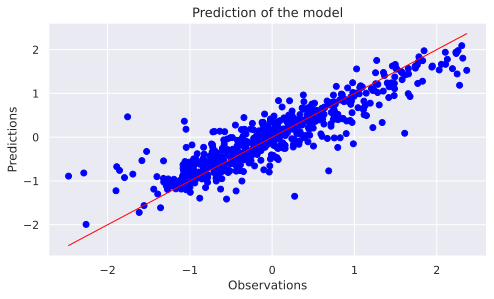

In [ ]:
ModelPlot(Algorithm, x_train, y_train, x_test, y_test)

In [ ]:
XGB=[]
XGB_R2 = cross_val_score(Algorithm, x, y, cv=5, scoring=R2)
XGB_RMSE = cross_val_score(Algorithm, x, y, cv=5, scoring=RMSE)
XGB = [np.mean(XGB_R2), np.mean(XGB_RMSE)]
XGB = np.pad(XGB,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['XGBoost'] = XGB
ModelCompare

[07:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.43 - R2= 0.73 
[07:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.35 - R2= 0.75 
[07:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.32 - R2= 0.79 
[07:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.36 - R2= 0.74 
[07:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.32 - R2= 0.84 
[07:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederr

Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                 0.726   
3  GridS-RMSE              NaN                NaN                 0.388   

   ElasticNet regularization  Linear SVM Resgression  \
0                      0.538                   0.670   
1                      0.504                   0.420   
2                      0.726                   0.792   
3                      0.388                   0.340   

   SVM Regression: Polynomial kernel  Random Forest  XGBoost  
0                              0.688          0.620    0.770  
1                              0.414          0.456    0.356  
2                              0.792          0.680      NaN  
3                              0.340          0.416      NaN

#### D2.2. Parameters tuning 

In [ ]:
XGBAlg = XGBRegressor()

XGB_params = {
   'max_depth':[3,4,5,6],
   'min_child_weight':[1,3,4,6],
   'gamma':[0, 0.1, 0.4, 0.5], 
   'learning_rate':[0.01, 0.05, 0.1, 0.2]  
   #,'n_estimators':[100, 500,700]
}

XGB_GSCV = GridSearchCV(XGBAlg, param_grid = XGB_params, cv=5)

XGB_GSCV.fit(x, y)

[07:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'gamma': [0, 0.1, 0.4, 0.5],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 3, 4, 6]})

In [ ]:
print(XGB_GSCV.best_params_)

print(f'Best score: {XGB_GSCV.best_score_}')

{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3}
Best score: 0.781249042103734


In [ ]:
XGBGS_Alg = XGBRegressor(gamma=0, learning_rate= 0.2, max_depth= 3, min_child_weight= 3)

In [ ]:
XGBGS_R2 = cross_val_score(XGBGS_Alg, x, y, cv=5, scoring=R2)
XGBGS_RMSE = cross_val_score(XGBGS_Alg, x, y, cv=5, scoring=RMSE)
XGB[2] = np.mean(XGBGS_R2)
XGB[3] = np.mean(XGBGS_RMSE)

ModelCompare ['XGBoost'] = XGB
ModelCompare

[07:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.42 - R2= 0.74 
[07:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.35 - R2= 0.75 
[07:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.31 - R2= 0.81 
[07:47:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.34 - R2= 0.76 
[07:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.31 - R2= 0.85 
[07:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederr

Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                 0.726   
3  GridS-RMSE              NaN                NaN                 0.388   

   ElasticNet regularization  Linear SVM Resgression  \
0                      0.538                   0.670   
1                      0.504                   0.420   
2                      0.726                   0.792   
3                      0.388                   0.340   

   SVM Regression: Polynomial kernel  Random Forest  XGBoost  
0                              0.688          0.620    0.770  
1                              0.414          0.456    0.356  
2                              0.792          0.680    0.782  
3                              0.340          0.416    0.346

#### D2.3. Important features

[07:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


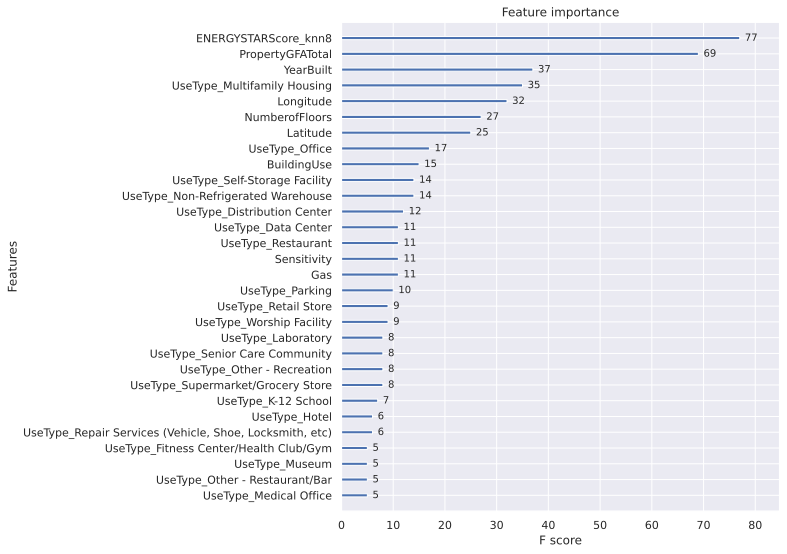

In [ ]:
%matplotlib inline

XGBGS_Alg.fit(x_train, y_train)
plt.figure(figsize=(7,9))
xgb.plot_importance(XGBGS_Alg, ax=plt.gca(), max_num_features = 30 ) 
plt.rcParams["figure.figsize"] = (20,100)
plt.show()

### D3. Stacking

In [ ]:
stackReg = StackingRegressor([('RFR', RFRGS_Alg), ('XGB', XGBGS_Alg), ('SVR', SVRGS_Alg)])            

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.2)

RMSE_test, R2_test, RMSE_train, R2_train = ModelEval(stackReg, x_train, y_train, x_test, y_test)

EvalDisplay(RMSE_test, R2_test, RMSE_train, R2_train)

[07:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model metrics
train RMSE= 0.27 - train R2= 0.89 
test RMSE= 0.36 - test R2= 0.85 


In [ ]:
stack=[]
stack_R2 = cross_val_score(stackReg, x, y, cv=5, scoring=R2)
stack_RMSE = cross_val_score(stackReg, x, y, cv=5, scoring=RMSE)
stack = [np.mean(stack_R2), np.mean(stack_RMSE)]
stack = np.pad(stack,(0,2), mode='constant',constant_values=(np.nan,))

ModelCompare['Stacking Regressor'] = stack
ModelCompare

[07:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.38 - R2= 0.78 
[07:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

Metrics  Dummy regressor  Linear Regression  Ridge Regularization  \
0          R2           -0.390              0.350                 0.726   
1        RMSE            0.872              0.518                 0.388   
2    GridS-R2              NaN                NaN                 0.726   
3  GridS-RMSE              NaN                NaN                 0.388   

   ElasticNet regularization  Linear SVM Resgression  \
0                      0.538                   0.670   
1                      0.504                   0.420   
2                      0.726                   0.792   
3                      0.388                   0.340   

   SVM Regression: Polynomial kernel  Random Forest  XGBoost  \
0                              0.688          0.620    0.770   
1                              0.414          0.456    0.356   
2                              0.792          0.680    0.782   
3                              0.340          0.416    0.346   

   Stacking Regressor  
0               0.800  
1               0.332  
2                 NaN  
3                 NaN

## E. Estimators comparison

In [ ]:
data = ModelCompare.loc[:, ModelCompare.columns != 'Metrics']
fig = go.Figure(data=[
    go.Bar(name='R2', x=data.columns, y=data.iloc[0], text= round(data.iloc[0],2) ),
    go.Bar(name='R2-GridSearch', x=data.columns, y=data.iloc[2], text= round(data.iloc[2],2))
])
fig.update_layout(title= "Energy estimators performances: R-square")
fig.show()

# 9. Features effect analysis


## 9.1. ENERGYSTARScore 

In [ ]:
OOBF

['ENERGYSTARScore_Median',
 'ENERGYSTARScore_knn1',
 'ENERGYSTARScore_knn2',
 'ENERGYSTARScore_knn5',
 'ENERGYSTARScore_knn6',
 'ENERGYSTARScore_knn7',
 'ENERGYSTARScore_knn8',
 'ENERGYSTARScore_knn10',
 'BuildingType']

In [ ]:
ESS_R2=[]
r2=[]
ESS=[]

XE = df5.drop(OOBF,  axis=1)
ye = XE['SiteEnergyUse(kBtu)'] 
XE=XE.drop(['SiteEnergyUse(kBtu)'],axis=1)

r2 =cross_val_score(stackReg, XE, ye, cv=5, scoring=R2) 
ESS_R2 = round(np.mean(r2),2)
ESS=['No ESS']

for i in range(len(OOBF)-1):
  XE[OOBF[i]] = df5[OOBF[i]]     
  r2 = cross_val_score(stackReg, XE, ye, cv=5, scoring=R2) 
  ESS_R2 = np.append(ESS_R2, round(np.mean(r2),2))
  ESS = np.append(ESS, OOBF[i])  
  XE= XE.drop([OOBF[i]], axis=1)

[08:00:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:00:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:00:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.49 - R2= 0.65 
[08:01:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:01:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py", line 759, in fit
    return super().fit(X, y, sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py", line 160, in fit
    for est in all_estimators
  File "/usr/local/lib/python3.7/dist-packages/joblib/

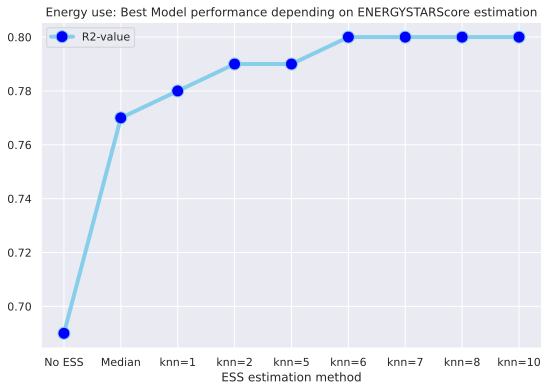

In [ ]:
ESS_df = pd.DataFrame({'Estimator' : ['No ESS', 'Median', 'knn=1', 'knn=2','knn=5','knn=6', 'knn=7', 'knn=8', 'knn=10'], 'R2-value': ESS_R2 }) 
plt.figure(figsize=(8, 6))
plt.plot( 'Estimator', 'R2-value', data=ESS_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.title('Energy use: Best Model performance depending on ENERGYSTARScore estimation')
plt.xlabel('ESS estimation method')
plt.show()

## 9.2. Residential buildings

In [ ]:
FE = OOBF.copy()
FE.remove('ENERGYSTARScore_knn8')
XE = data_resid.drop(FE ,  axis=1)
ye = XE['SiteEnergyUse(kBtu)'] 
xe= XE.drop(['SiteEnergyUse(kBtu)'],axis=1)  
r21 = cross_val_score(stackReg, xe, ye, cv=5, scoring=R2) 
print(f'R2 of residential buildings: {round(np.mean(r21),2)}')

[09:18:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.22 - R2= 0.89 
[09:18:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

In [ ]:
FE = OOBF.copy()
FE.remove('ENERGYSTARScore_knn8')
XE = data_Nresid.drop(FE ,  axis=1)
ye = XE['SiteEnergyUse(kBtu)'] 
xe= XE.drop(['SiteEnergyUse(kBtu)'],axis=1)  
r22 = cross_val_score(stackReg, xe, ye, cv=5, scoring=R2) 
print(f'R2 of residential buildings: {round(np.mean(r22),2)}')

[09:23:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE= 0.35 - R2= 0.78 
[09:23:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

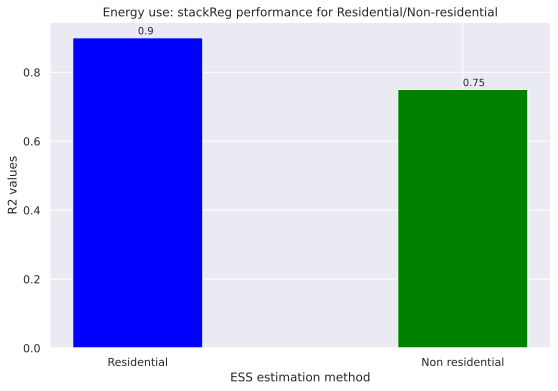

In [ ]:
r2 = [round(np.mean(r21),2), round(np.mean(r22),2)]
Type = ['Residential', 'Non residential']
plt.figure(figsize=(8, 6))
plt.bar(Type, r2, color=['blue','green'] ,width= 0.4 )
plt.title('Energy use: stackReg performance for Residential/Non-residential')
plt.xlabel('ESS estimation method')
plt.ylabel('R2 values')
plt.text(x= Type[0], y = r2[0]+0.01 , s=r2[0])
plt.text(x= Type[1], y = r2[1]+0.01 , s=r2[1])

plt.show()

# 10. Conclusion

• The best estimator for both energy consumption and GHG emission is the stacking regressor, a combination of the three tunned parameters algorithms: Random forest, SVM regressor and XGBoost.


• ENERGYSTARScore’s estimation has a remarquable effect on both models best estimator. Particularly for energy use where R square gains over than 0.1 thanks to a 6 neighboors KNN estimation of ENERGYSTARScore.


• The model is far more performant for residential buildings type (50% of data instances). For instance, energy use’s best model riches R2=0.9 performance against 0.75 for non residential type of buildings.  